In [9]:
## NGH extraction opportunity valuation ## 

import numpy as np
import pandas as pd
import math
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multinomial
from typing import List
import seaborn as sns

def extract(E,St):
    S = St - E
    return S

## E => daily extraction, Pt => price for day t, vc and fc => variable and fixed costs ## 

## pi_tax => corporate rate, c_tax => carbon tax ##

def profit_t(E,Pt,vc,fc,pi_tax,c_tax):
    pi = ((E*(Pt-vc-c_tax))-fc)*(1-pi_tax)
    return pi

## T => days of extraction remaining, r => effective daily interest rate ##

def value_simple(T,r,pi):
    v = pi*(math.exp(-r*T))*(1/r)
    return v

In [10]:
## sample fixed price valuation 

pi = profit_t(30000,4.5,2,10000,0.33,1)
v = value_simple(3650,0.00012328,pi)
print(v)

121291359.73423365


In [11]:
## price evolution process ##

def price_evo_ec_gbm(states: List[int], etas: List[float], mus: List[float], sigmas: List[float]) -> List[float]:
    prices = []
    prev_loc = 2.96
    for state in states:
        price = etas[state]*(mus[state] - prev_loc) + prev_loc*(1 + (1/100)*norm.rvs(0,sigmas[state])) 
        prices.append(price)
        prev_loc = price
    return prices

[[0.2846 0.6879 0.0275]
 [0.1704 0.8071 0.0225]
 [0.1458 0.466  0.3882]]


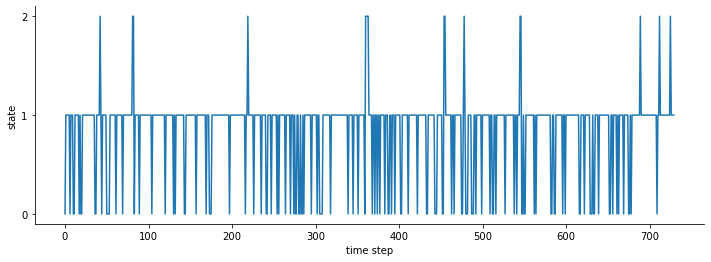

In [12]:
p_init = np.array([1, 0, 0])
pT = np.array([[0.2846,0.6879,0.0275], [0.1704,0.8071,0.0225],[0.1458,0.4660,0.3882]])
print(pT)

def markov_sequence(p_init: np.array, pT: np.array, sequence_length: int) -> List[int]:
    """
    Generate a Markov sequence based on p_init and p_transition.
    """
    if p_init is None:
        p_init = equilibrium_distribution(pT)
    initial_state = list(multinomial.rvs(1, p_init)).index(1)

    states = [initial_state]
    for _ in range(sequence_length - 1):
        p_tr = pT[states[-1]]
        new_state = list(multinomial.rvs(1, p_tr)).index(1)
        states.append(new_state)
    return states

## generate markov sequence given available data ##

states = markov_sequence(p_init, pT, sequence_length=730)
fig,  ax = plt.subplots(figsize=(12, 4))
plt.plot(states)
plt.xlabel("time step")
plt.ylabel("state")
plt.yticks([0, 1, 2])
sns.despine()

def plot_prices(states, prices):
    fig, axes = plt.subplots(figsize=(16, 8), nrows=2, ncols=1, sharex=True)

    axes[0].plot(states)
    axes[0].set_title("States")
    axes[1].plot(prices)
    axes[1].set_title("Prices")
    sns.despine();

In [13]:
hh_prices = price_evo_ec_gbm(states,etas=(0.1,0.05,0.05),mus=(2,4,6),sigmas=(0.25,0.5,0.75))

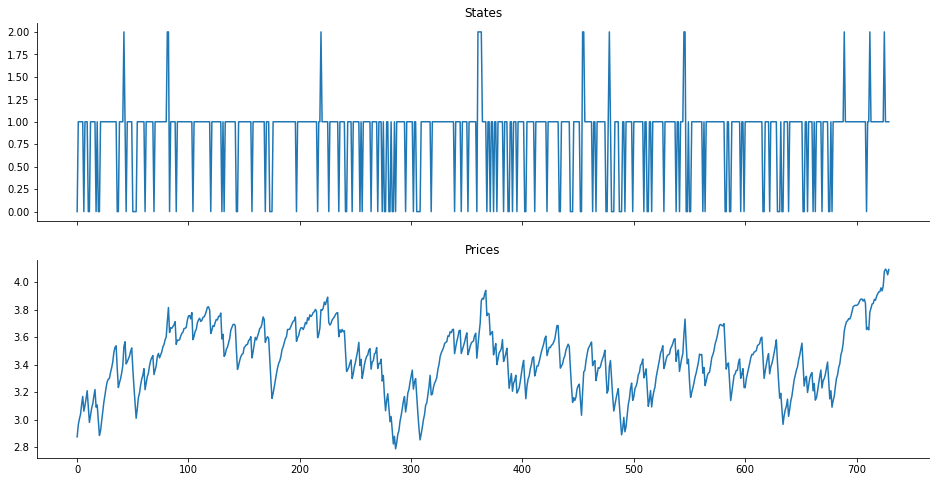

In [14]:
plot_prices(states,hh_prices)

In [8]:
pi_t 

TypeError: unsupported operand type(s) for -: 'list' and 'int'